In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

**Информация о датасете:**
Датасет был создан, чтобы выяснить, можно ли заменить дорогостояющую проверку сложных моделей процессов прогнозированием результатов аукциона.


---


Каждая строка датасета - один цикл проверки. Проверяем, возможна ли конкретная цена для конкретного товара, и может ли конкретный участник торгов выиграть товар по этой цене.

Фичи:


1.   process.b1.capacity - Вместимость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 1.
2.   process.b2.capacity - Емкость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 2.
3.  process.b3.capacity - Емкость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 3.
4. process.b4.capacity - Вместимость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 4.
5. property.price - Цена в данный момент подтверждена.
6. property.product - Продукт в настоящее время проверен.
7. property.winner - 	Участник торгов в настоящее время подтвержден как победитель продукта (0, если подтверждена только цена).
8. verification.result - Результат двоичной проверки - возможен ли проверенный результат?
9. verification.time - Время выполнения процедуры проверки.



**Для начала скачаем датасет и загрузим его в фрейм данных. Распечатаем первые 3 строки.**

In [ ]:
data = pd.read_csv("/content/data.csv")
data.head(3)

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889


**Посмотрим статистическую информацию о данных**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [ ]:
data.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


**Заметим, что нет ни одного пропущенного значения.**
**Посмотрим, какие столбцы имеются в нашем датасете.**

In [ ]:
data.columns

Index(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.result', 'verification.time'],
      dtype='object')

**Количество строк и столбцов**

In [ ]:
data.shape

(2043, 9)

**Выберем в качестве таргета столбец verification.result. Посмотрим, сколько объектов принадлежит каждому классу.**

In [ ]:
data['verification.result'].value_counts()

,count
verification.result,
False,1781
True,262


**Удалим из исходного датасета таргет.**

In [ ]:
y = data.pop('verification.result')
df = data

**Масштабируем данные, применим MinMaxScaler**

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**Разделим данные на обучающую и тестовую выборки в пропорциях 70/30**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled, y, test_size=0.3, random_state=17, stratify=y
)

Далее попробуем следующие алгоритмы:

Logistic Regression (логистическая регрессия) Random Forest (случайный лес) Support Vector Machine (машина опорных векторов, SVM) K-Nearest Neighbors (k ближайших соседей, KNN) Gradient Boosting (градиентный бустинг)

Логистическая регрессия

In [ ]:
logistic_model = LogisticRegression() #Инифиализация модели
logistic_params = {"C": [0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"]} #Параметры для GridSearchCV
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring="accuracy", n_jobs=-1) #Использование GridSearchCV
logistic_grid.fit(X_train, y_train)
best_logistic = logistic_grid.best_estimator_ #Обучаем модель с лучшими параметрами
y_pred_logistic = best_logistic.predict(X_test) #Предскзываем на тесте

Смотрим метрики

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_logistic, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.99      0.94       534
     class 1       0.64      0.18      0.28        79

    accuracy                           0.88       613
   macro avg       0.76      0.58      0.61       613
weighted avg       0.86      0.88      0.85       613



In [ ]:
print("Logistic Regression Metrics:")
print(f"Best Parameters: {logistic_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logistic):.4f}")

Logistic Regression Metrics:
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8809
Precision: 0.6364
Recall: 0.1772
F1 Score: 0.2772


Строиим ROC-кривую

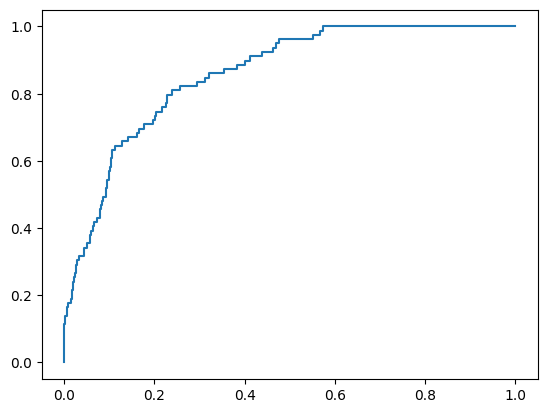

In [ ]:
if hasattr(best_logistic, "predict_proba"):
    y_proba_logistic = best_logistic.predict_proba(X_test)[:, 1]
else:
    y_proba_logistic = best_logistic.decision_function(X_test)

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_proba_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_proba_logistic)
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.4f})')


Случайный лес

In [ ]:
rf_model = RandomForestClassifier()
rf_params = {"n_estimators": [100, 200], "max_depth": [10, 20, None], "min_samples_split": [2, 5]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

Смотрим метрики

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       534
     class 1       1.00      0.97      0.99        79

    accuracy                           1.00       613
   macro avg       1.00      0.99      0.99       613
weighted avg       1.00      1.00      1.00       613



In [ ]:
print("Random Forest Metrics:")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

Random Forest Metrics:
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9951
Precision: 1.0000
Recall: 0.9620
F1 Score: 0.9806


Строим ROC-кривую

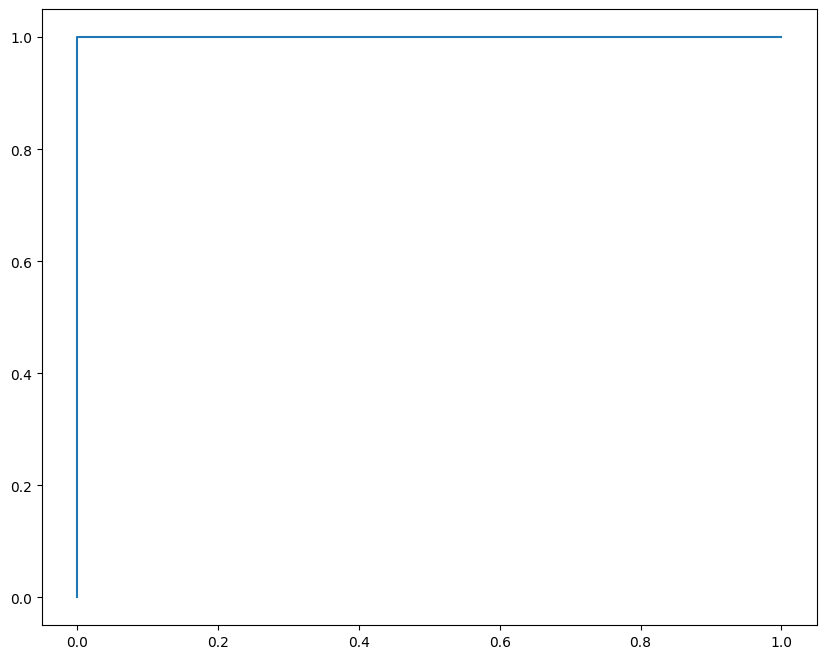

In [ ]:
if hasattr(best_rf, "predict_proba"):
    y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
else:
    y_proba_rf = best_rf.decision_function(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

Метод опорных векторов

In [ ]:
svm_model = SVC()
svm_params = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring="accuracy", n_jobs=-1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

Смотрим метрики

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97       534
     class 1       0.98      0.56      0.71        79

    accuracy                           0.94       613
   macro avg       0.96      0.78      0.84       613
weighted avg       0.94      0.94      0.93       613



In [ ]:
print("SVM Metrics:")
print(f"Best Parameters: {svm_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.4f}")

SVM Metrics:
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9413
Precision: 0.9778
Recall: 0.5570
F1 Score: 0.7097


Строим ROC-кривую

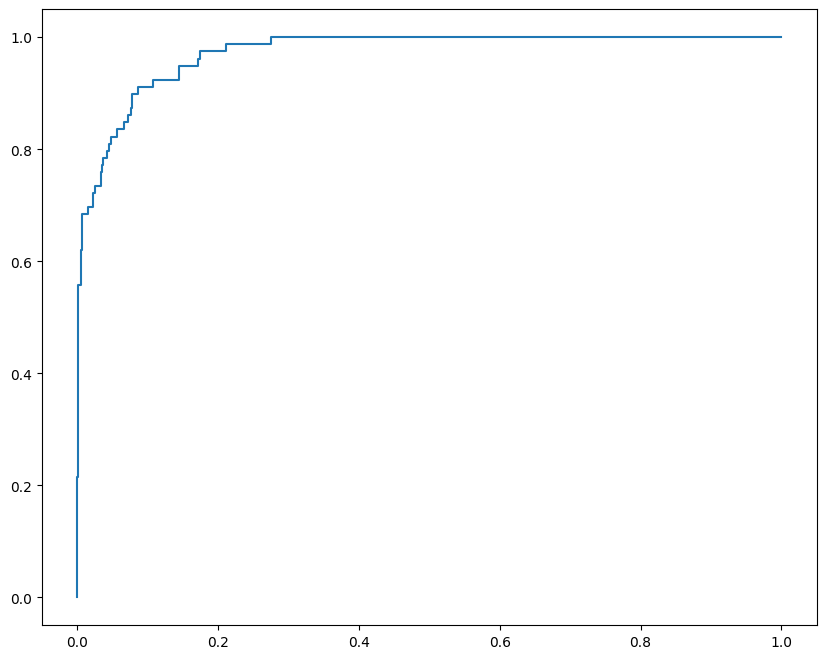

In [ ]:
if hasattr(best_svm, "predict_proba"):
    y_proba_svm = best_svm.predict_proba(X_test)[:, 1]
else:
    y_proba_svm = best_svm.decision_function(X_test)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})')

K-ближайших соседей

In [ ]:
knn_model = KNeighborsClassifier()
knn_params = {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring="accuracy", n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      0.99      0.94       534
     class 1       0.83      0.24      0.37        79

    accuracy                           0.90       613
   macro avg       0.86      0.62      0.66       613
weighted avg       0.89      0.90      0.87       613



Смотрим метрики

In [ ]:
print("KNN Metrics:")
print(f"Best Parameters: {knn_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

KNN Metrics:
Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.8956
Precision: 0.8261
Recall: 0.2405
F1 Score: 0.3725


Строим ROC-кривую

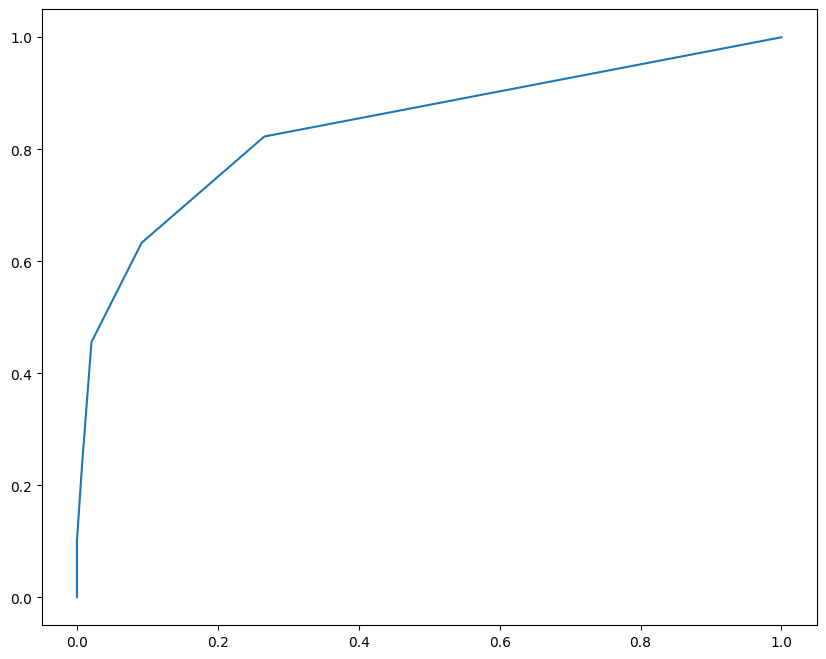

In [ ]:
if hasattr(best_knn, "predict_proba"):
    y_proba_knn = best_knn.predict_proba(X_test)[:, 1]
else:
    y_proba_knn = best_knn.decision_function(X_test)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.4f})')

Градиентный бустинг

In [ ]:
gb_model = GradientBoostingClassifier()
gb_params = {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring="accuracy", n_jobs=-1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)

Смотрим метрики

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_gb, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       534
     class 1       1.00      0.97      0.99        79

    accuracy                           1.00       613
   macro avg       1.00      0.99      0.99       613
weighted avg       1.00      1.00      1.00       613



In [ ]:
print("Gradient Boosting Metrics:")
print(f"Best Parameters: {gb_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb):.4f}")

Gradient Boosting Metrics:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.9967
Precision: 1.0000
Recall: 0.9747
F1 Score: 0.9872


Строим ROC-кривую

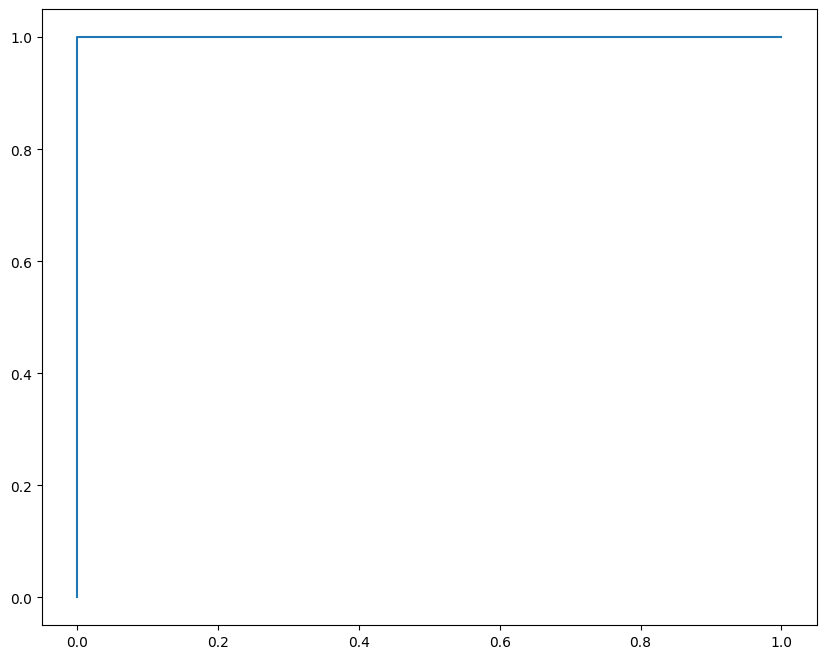

In [ ]:
if hasattr(best_gb, "predict_proba"):
    y_proba_gb = best_gb.predict_proba(X_test)[:, 1]
else:
    y_proba_gb = best_gb.decision_function(X_test)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})')

Таким образом, среди всех моделей, выберем наилучшие: случайный лес и градиентных бустинг.


Однако, в 3-х из 4-х метрик выигрывает градиентный бустинг. Выберем его наилучшим.